# Analysis Summary: </br>
## Given the current Crypto Currency data set there is not a clear well defined clustering of data when applying t-SNE and K-mean unsupervised clustering models. </br> 
--------------------------------------------- </br>
## Model Outcomes:</br>
### t-SNE Summary - There was a very dense cluster with some outlier data points. However, this is not enough to distinquish a high degree of certainty to apply outcomes inorder to move into supervised learning. </br> 

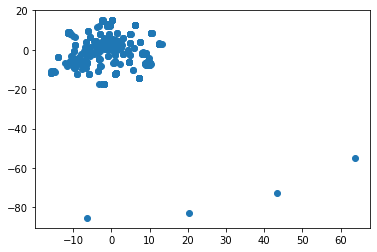 </br>

### K-means Summary - Similar to the t-SNE model there is not a well defined number of clusters that can be applied as there is a relatively consistent slope when ploting inertia over number of clusters. </br> 

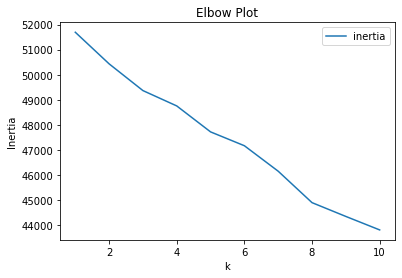



# Analysis Work

In [4]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Data Preparation

In [5]:
file = Path('crypto_data.csv')

In [6]:
df = pd.read_csv(file, index_col=0)
df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [10]:
# List all algorithms in use
algorithms = set(df.Algorithm.values)
print(algorithms)

{'PHI1612', 'Semux BFT consensus', 'X16S', 'SHA-512', 'Progressive-n', 'SkunkHash', 'Shabal256', 'CryptoNight Heavy', 'Scrypt-n', 'Cryptonight-GPU', 'HMQ1725', 'QuarkTX', 'X13', 'X15', 'IMesh', 'Time Travel', 'CryptoNight-V7', 'C11', 'VBFT', 'XEVAN', 'Leased POS', 'Dagger', 'Counterparty', 'NIST5', 'Quark', 'Curve25519', 'DPoS', 'Blake', 'CryptoNight-Lite', 'NeoScrypt', 'M7 POW', 'SHA-256 + Hive', 'Equihash', 'Lyra2REv2', '1GB AES Pattern Search', 'Multiple', 'QUAIT', 'X16R', 'X11', 'Lyra2RE', 'ScryptOG', 'Green Protocol', 'Zhash', 'HybridScryptHash256', 'Keccak', 'Blake2S', 'Proof-of-Authority', 'Stanford Folding', 'TRC10', 'Dagger-Hashimoto', '536', 'Slatechain', 'BLAKE256', 'X11GOST', 'Scrypt', 'CryptoNight Heavy X', 'QuBit', 'POS 2.0', 'Momentum', 'Skein', 'Tribus', 'Cloverhash', 'VeChainThor Authority', 'Proof-of-BibleHash', 'ECC 256K1', 'Ouroboros', 'T-Inside', 'Jump Consistent Hash', 'POS 3.0', 'PHI2', 'Avesta hash', 'X14', 'Lyra2Z', 'XG Hash', 'Rainforest', 'Argon2d', 'vDPOS', 

In [9]:
# print the counts of stocks being currently traded vs. not being currently traded 
df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [11]:
# Select only cryptocurrencies that are being traded
df = df.loc[df["IsTrading"] == True]
df["IsTrading"].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [12]:
# Delete the IsTrading column; it is no longer necessary
df= df.drop("IsTrading", axis=1)
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [13]:
# Delete all rows with null values
df = df.dropna(axis=0, how='any')
df.shape

(685, 5)

In [14]:
# Sort values in TotalCoinsMined to identify negative or zero values
df.TotalCoinsMined.sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [15]:
# Select only rows with positive TotalCoinsMined values
df = df[df["TotalCoinsMined"]>0]
len(df)

532

In [16]:
# Delete the CoinName column from the original dataframe
df= df.drop("CoinName", axis=1)
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [17]:
# Create dummy variables for columns with string values
values = pd.get_dummies(data=df, columns=["Algorithm", "ProofType"])
print(values.shape)
values.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Standardize the data
scaler = StandardScaler()
values_scaled=scaler.fit_transform(values)

In [21]:
# print the scaled data
values_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [22]:
# Identify the numbers of rows and columns in the scaled data
print(values_scaled.shape)

(532, 98)


### Reduce dataset dimensions with PCA

In [23]:
# Reduce dimensions with PCA
pca = PCA(n_components=0.99)
principal_components = pca.fit_transform(values_scaled)
principal_components.shape

(532, 86)

In [24]:
# The sum of the explained variance of the principal components
pca.explained_variance_.sum()

97.35133315075764

In [25]:
# Reduce dimensions with t-SNE
tsne_1 = TSNE(perplexity=50)
tsne_1Features = tsne_1.fit_transform(principal_components)
tsne_1Features.shape

(532, 2)

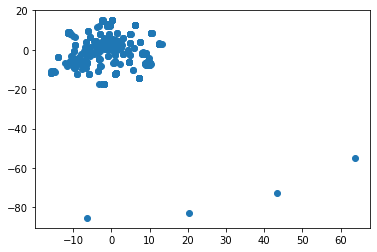

In [26]:
# Plot t-SNE output
X = tsne_1Features[:,0]
y = tsne_1Features[:,1]

plt.scatter(X,y)
plt.show()

In [27]:
# Identify clusters with k-means
inertia = []
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for value in k:
    kmeans = KMeans(n_clusters = value, random_state=0)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

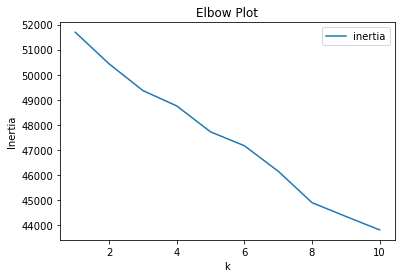

In [28]:
# Create an elbow plot
Elbow_Plot = pd.DataFrame({'K': k, 'inertia': inertia})
Elbow_Plot.plot.line(x='K', y='inertia')
plt.ylabel("Inertia")
plt.xlabel("k")
plt.title("Elbow Plot")
plt.show()